In [1]:
#package imports
import cv2
import numpy as np
import pandas as pd
import sys
import types
import matplotlib.pyplot as plt

In [2]:
#user inputs
print("Please enter I for image, V for Video or C for Camera stream \n")
selector = input()
print("Please enter the directory address of the image/video (type 0 if you wish to use camera) \n")
path = input()

Please enter I for image, V for Video or C for Camera stream 

I
Please enter the directory address of the image/video (type 0 if you wish to use camera) 

C:\Users\agman\Desktop\Human tracking files\Images & Videos\large-group-of-people-white-background.jpg


In [4]:
#Read and display 
if (selector=="I"):
    img = cv2.imread(path)
    cv2.imshow('Hello World', img)
    cv2.waitKey(0)
elif (selector=="V"):
    img = cv2.VideoCapture(path)
    while img.isOpened():
        ret, frame = img.read()
    # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        cv2.imshow('frame', frame)
        if cv2.waitKey(40) == ord('q'):
            break
    img.release()
    cv2.destroyAllWindows()

elif (selector=="C"):
    img = cv2.VideoCapture(0)
    if not img.isOpened():
        print("Cannot open camera")
        exit()
    while True:
        # Capture frame-by-frame
        ret, frame = img.read()
        # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        # Display the resulting frame
        flip_img = cv2.flip(frame,1)
        cv2.imshow('frame', flip_img)
        if cv2.waitKey(1) == ord('q'):
            break
# When everything done, release the capture
    img.release()
    cv2.destroyAllWindows()
else:
    print ("Invalid selector input\n")

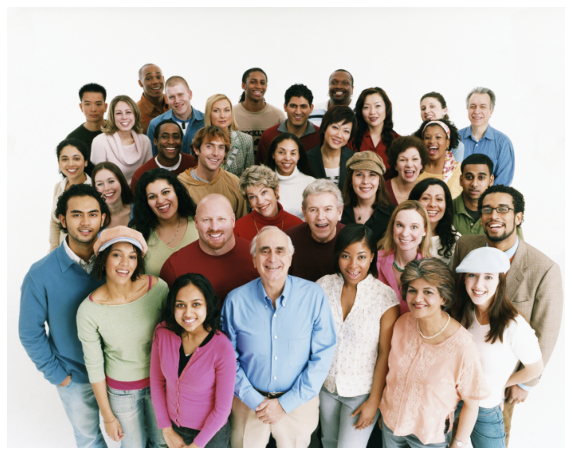

In [9]:
fig = plt.figure(figsize=(10, 10))
image = plt.imread(path)
plt.axis('off')
plt.imshow(image)

In [12]:
import urllib.request
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg

--2021-06-23 22:02:59--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: 'yolov3.weights'

     0K .......... .......... .......... .......... ..........  0%  210K 19m12s
    50K .......... .......... .......... .......... ..........  0%  227K 18m28s
   100K .......... .......... .......... .......... ..........  0%  210K 18m43s
   150K .......... .......... .......... .......... ..........  0%  961K 15m5s
   200K .......... .......... .......... .......... ..........  0% 5.27M 12m13s
   250K .......... .......... .......... .......... ..........  0%  278K 12m35s
   300K .......... .......... .......... .......... ..........  0% 2.93M 10m59s
   350K .......... .......... .......... .......... ..........  0% 1.30M 9m59s
   400K .......... .......... .

 74600K .......... .......... .......... .......... .......... 30% 4.36M 59s
 74650K .......... .......... .......... .......... .......... 30% 5.40M 59s
 74700K .......... .......... .......... .......... .......... 30% 4.13M 59s
 74750K .......... .......... .......... .......... .......... 30% 3.25M 59s
 74800K .......... .......... .......... .......... .......... 30% 1.88M 59s
 74850K .......... .......... .......... .......... .......... 30% 1.80M 59s
 74900K .......... .......... .......... .......... .......... 30% 1.86M 59s
 74950K .......... .......... .......... .......... .......... 30% 3.42M 59s
 75000K .......... .......... .......... .......... .......... 30% 4.16M 59s
 75050K .......... .......... .......... .......... .......... 31% 1.65M 59s
 75100K .......... .......... .......... .......... .......... 31% 5.60M 59s
 75150K .......... .......... .......... .......... .......... 31% 3.12M 59s
 75200K .......... .......... .......... .......... .......... 31% 2.76M 59s

 99600K .......... .......... .......... .......... .......... 41% 4.34M 48s
 99650K .......... .......... .......... .......... .......... 41% 4.75M 48s
 99700K .......... .......... .......... .......... .......... 41% 4.36M 48s
 99750K .......... .......... .......... .......... .......... 41% 3.50M 48s
 99800K .......... .......... .......... .......... .......... 41% 3.16M 48s
 99850K .......... .......... .......... .......... .......... 41% 7.49M 48s
 99900K .......... .......... .......... .......... .......... 41% 4.33M 48s
 99950K .......... .......... .......... .......... .......... 41% 3.83M 48s
100000K .......... .......... .......... .......... .......... 41% 2.70M 48s
100050K .......... .......... .......... .......... .......... 41%  650K 48s
100100K .......... .......... .......... .......... .......... 41% 1.92M 48s
100150K .......... .......... .......... .......... .......... 41%  415K 48s
100200K .......... .......... .......... .......... .......... 41% 5.34M 48s

174550K .......... .......... .......... .......... .......... 72% 1.42M 22s
174600K .......... .......... .......... .......... .......... 72% 4.22M 22s
174650K .......... .......... .......... .......... .......... 72% 4.99M 22s
174700K .......... .......... .......... .......... .......... 72% 6.24M 22s
174750K .......... .......... .......... .......... .......... 72% 4.49M 22s
174800K .......... .......... .......... .......... .......... 72% 6.13M 22s
174850K .......... .......... .......... .......... .......... 72% 6.54M 22s
174900K .......... .......... .......... .......... .......... 72% 1.24M 22s
174950K .......... .......... .......... .......... .......... 72% 5.67M 22s
175000K .......... .......... .......... .......... .......... 72% 2.97M 22s
175050K .......... .......... .......... .......... .......... 72% 6.38M 22s
175100K .......... .......... .......... .......... .......... 72% 4.67M 22s
175150K .......... .......... .......... .......... .......... 72% 5.50M 22s

199550K .......... .......... .......... .......... .......... 82% 4.45M 14s
199600K .......... .......... .......... .......... .......... 82% 4.29M 14s
199650K .......... .......... .......... .......... .......... 82% 5.42M 14s
199700K .......... .......... .......... .......... .......... 82% 5.21M 14s
199750K .......... .......... .......... .......... .......... 82% 3.23M 14s
199800K .......... .......... .......... .......... .......... 82% 3.37M 14s
199850K .......... .......... .......... .......... .......... 82% 4.91M 14s
199900K .......... .......... .......... .......... .......... 82% 5.27M 14s
199950K .......... .......... .......... .......... .......... 82% 3.51M 14s
200000K .......... .......... .......... .......... .......... 82% 6.00M 14s
200050K .......... .......... .......... .......... .......... 82% 6.16M 14s
200100K .......... .......... .......... .......... .......... 82% 3.93M 14s
200150K .......... .......... .......... .......... .......... 82% 3.37M 14s

--2021-06-23 22:04:18--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Resolving github.com (github.com)... 13.234.176.102
Connecting to github.com (github.com)|13.234.176.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg [following]
--2021-06-23 22:04:19--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: 'yolov3.cfg'

     0K ........                                              100%  568K=0.01s

2021-06-23 22:04:20 (568 KB/s) - 'yolov3.cfg' saved [8342/8342]



In [13]:
classes = ["person"]

In [22]:
img = cv2.imread(path, cv2.IMREAD_COLOR) # Returns None on bad file
rimg = cv2.resize(img, (864, 480),
               interpolation = cv2.INTER_NEAREST)
dims = rimg.shape
print("Image width: {}, height: {}, depth: {}".format(dims[1], dims[0], dims[2]))

Image width: 864, height: 480, depth: 3


In [23]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [24]:
scale = 1./255

dims = rimg.shape
# blobFromImage(image, scale, (Width,Height), (0,0,0), True, crop=False)
blob = cv2.dnn.blobFromImage(rimg, scale, (dims[1], dims[0]), (0,0,0), True, crop=False)

# Set the input to the model
net.setInput(blob)

In [25]:
def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color1 = np.array([0.0,0.0,255.]) # red
    color2 = np.array([0.0,255.0,255.0])# Other yellow
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color1, 2)
    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color2, 2)

In [26]:
# run inference through the network and gather predictions from output layers
outs = net.forward(get_output_layers(net))
# input image shape (dims=img.shape)
Width=dims[1]
Height=dims[0]

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detection from each output layer, get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [27]:
print("Classes found: " + str(class_ids))
print("Classes names: " + str([classes[i] for i in class_ids]) )
print("Classes confidence: " + str(confidences))

Classes found: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Classes names: ['person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person',

In [28]:
# apply non-max suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
# go through the detections remaining
# after nms and draw bounding box
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(img, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

# save output image to disk
retval = cv2.imwrite("object-detection.jpg", img)

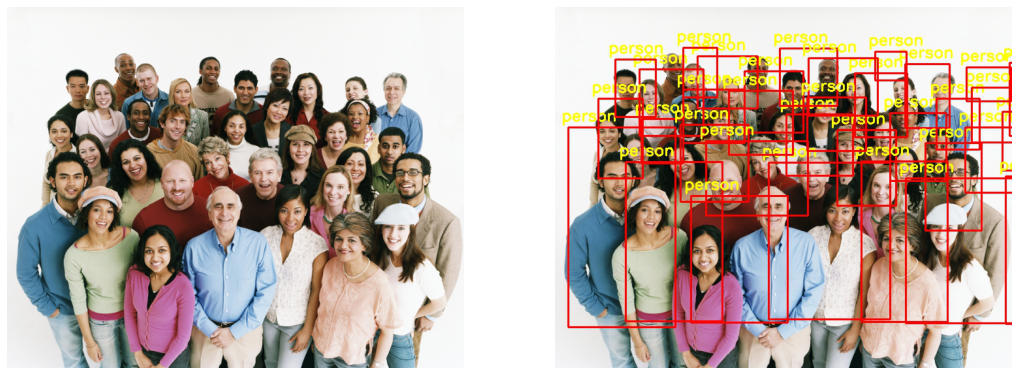

In [30]:
img_plt = plt.imread(path)
img2_plt = plt.imread('object-detection.jpg')

fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[1].axis('off')
ax[0].figure.set_size_inches(18,10)
ax[1].figure.set_size_inches(18,10)

ax[0].imshow(img_plt);
ax[1].imshow(img2_plt);

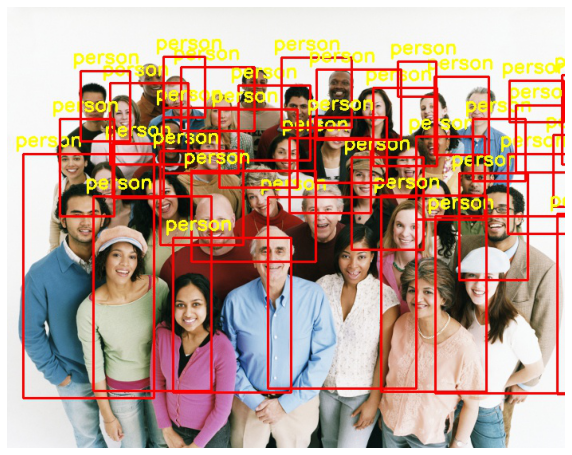

In [31]:
# To see the object detection image bigger
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img2_plt)